In [1]:
import pandas as pd 
import json
from model_utils import COLUMNS
from run_grid_search import load_json
import seaborn as sns 
sns.set(rc={"figure.figsize": (20, 10)})

In [2]:
IGNORE = ["svr", "ensamble2", "ensamble3", "knn"]

In [3]:
features = load_json("selected_features.json")

In [4]:
features

{'linear_regression': ['positivos',
  'positivos_global_pct',
  'neutros_global_pct',
  'day2',
  'likes',
  'retweets'],
 'ada_boost': ['positivos_individual_pct',
  'neutros_global_pct',
  'day2',
  'seguidores',
  'fora'],
 'random_forest': ['neutros_global_pct', 'day2', 'seguidores', 'fora'],
 'lasso': ['neutros_global_pct', 'negativos_global_pct', 'seguidores', 'fora'],
 'ridge': ['positivos',
  'neutros_individual_pct',
  'neutros_global_pct',
  'day1',
  'likes',
  'fora'],
 'elastic_net': ['positivos_individual_pct',
  'neutros_global_pct',
  'negativos_global_pct',
  'day1',
  'seguidores',
  'fora'],
 'sgd': ['positivos',
  'positivos_individual_pct',
  'neutros_individual_pct',
  'neutros_global_pct',
  'negativos_global_pct',
  'day1',
  'likes',
  'fora'],
 'knn': ['neutros_global_pct', 'day2', 'seguidores', 'fora'],
 'svr': ['neutros_global_pct', 'day2', 'seguidores', 'fora'],
 'ensamble2': ['neutros_global_pct', 'day2', 'seguidores', 'fora'],
 'ensamble3': ['neutros_glob

# Listando atributos por modelo

In [5]:
for model in features.keys():
    print(f"- Model: {model}")
    for ft in features[model]:
        print(f"\t - {ft}")

- Model: linear_regression
	 - positivos
	 - positivos_global_pct
	 - neutros_global_pct
	 - day2
	 - likes
	 - retweets
- Model: ada_boost
	 - positivos_individual_pct
	 - neutros_global_pct
	 - day2
	 - seguidores
	 - fora
- Model: random_forest
	 - neutros_global_pct
	 - day2
	 - seguidores
	 - fora
- Model: lasso
	 - neutros_global_pct
	 - negativos_global_pct
	 - seguidores
	 - fora
- Model: ridge
	 - positivos
	 - neutros_individual_pct
	 - neutros_global_pct
	 - day1
	 - likes
	 - fora
- Model: elastic_net
	 - positivos_individual_pct
	 - neutros_global_pct
	 - negativos_global_pct
	 - day1
	 - seguidores
	 - fora
- Model: sgd
	 - positivos
	 - positivos_individual_pct
	 - neutros_individual_pct
	 - neutros_global_pct
	 - negativos_global_pct
	 - day1
	 - likes
	 - fora
- Model: knn
	 - neutros_global_pct
	 - day2
	 - seguidores
	 - fora
- Model: svr
	 - neutros_global_pct
	 - day2
	 - seguidores
	 - fora
- Model: ensamble2
	 - neutros_global_pct
	 - day2
	 - seguidores
	 - fora

# Distribuição de escolhas

In [6]:
features_df = pd.DataFrame(columns=["qty"], index=COLUMNS)
features_df["qty"] = 0

In [7]:
for feature in features_df.index:
    for model in features.keys():
        if model in IGNORE: continue
        if feature in features[model]:
            features_df.loc[feature] += 1

In [8]:
features_df = features_df[features_df["qty"] > 0].sort_values(by="qty", ascending=False)

In [9]:
features_df

,qty
neutros_global_pct,7
fora,6
seguidores,4
positivos,3
positivos_individual_pct,3
negativos_global_pct,3
day1,3
day2,3
likes,3
neutros_individual_pct,2


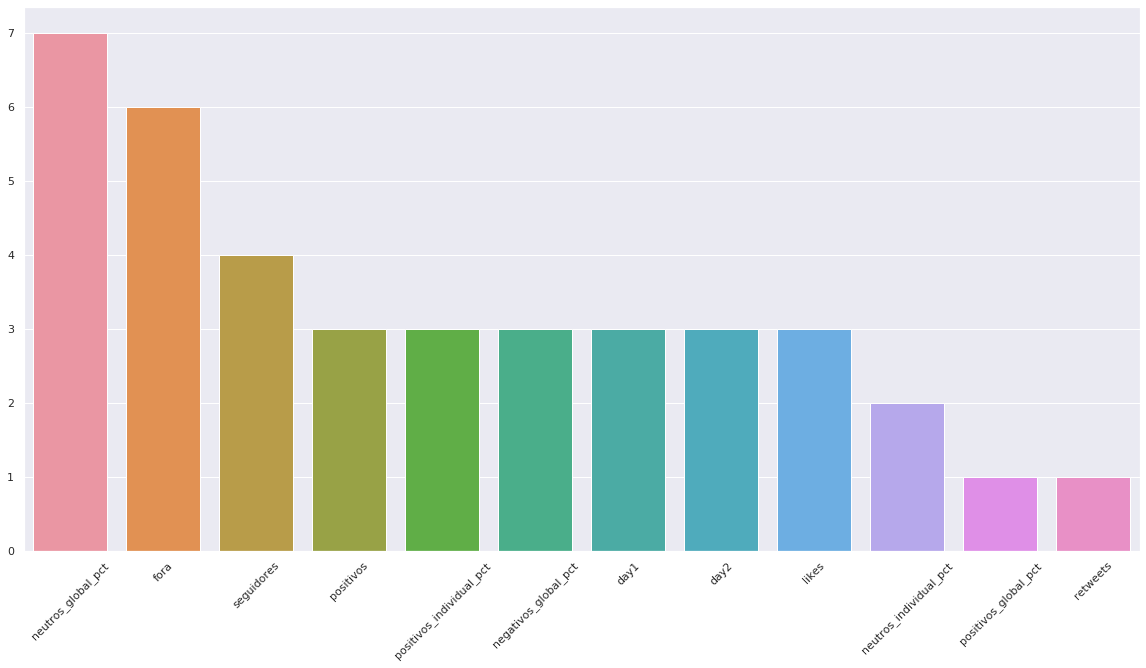

In [10]:
chart = sns.barplot(x=features_df.index, y=features_df["qty"].values)
for item in chart.get_xticklabels():
    item.set_rotation(45)